In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv')

# Preprocessing (assuming a 'label' column exists or you can create one)
#Important Note: This code assumes you have a 'label' column in your dataset.
#The MIT-BIH Arrhythmia Database requires significant preprocessing to generate labels.
#You will need to implement a robust method for labeling the heartbeats according to arrhythmia types.
#This often involves using annotations provided with the original database.
#This example shows a placeholder.
#If your data is not labeled, this code will not produce meaningful results.



In [2]:
#Example of placeholder labelling (you will need to replace this with accurate labelling)
#This code will create a random label for demonstration purpose.
if 'label' not in df.columns:
    df['label'] = np.random.randint(0, 5, df.shape[0]) # Creates random labels. replace with real labels.

# Drop unnecessary columns (e.g., 'Unnamed: 0', 'time_ms' if not needed for features)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
if 'time_ms' in df.columns:
    df = df.drop('time_ms', axis=1)

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) #Adjust parameters as needed.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) #Get probabilities for ROC/AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")



Accuracy: 0.1995076923076923
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.18      0.19     25989
           1       0.20      0.23      0.21     25812
           2       0.20      0.18      0.19     26059
           3       0.20      0.31      0.24     25907
           4       0.20      0.10      0.13     26233

    accuracy                           0.20    130000
   macro avg       0.20      0.20      0.19    130000
weighted avg       0.20      0.20      0.19    130000

Confusion Matrix:
[[4729 5872 4633 8121 2634]
 [4649 5814 4576 8098 2675]
 [4738 5881 4608 8128 2704]
 [4637 5859 4528 8119 2764]
 [4618 5942 4644 8363 2666]]


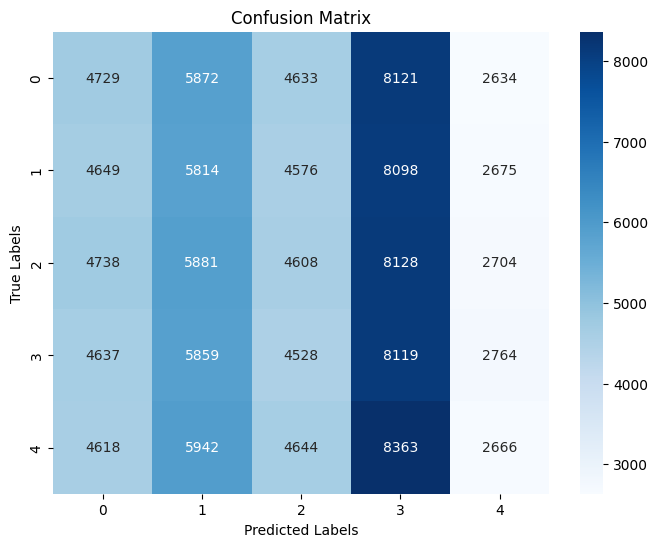

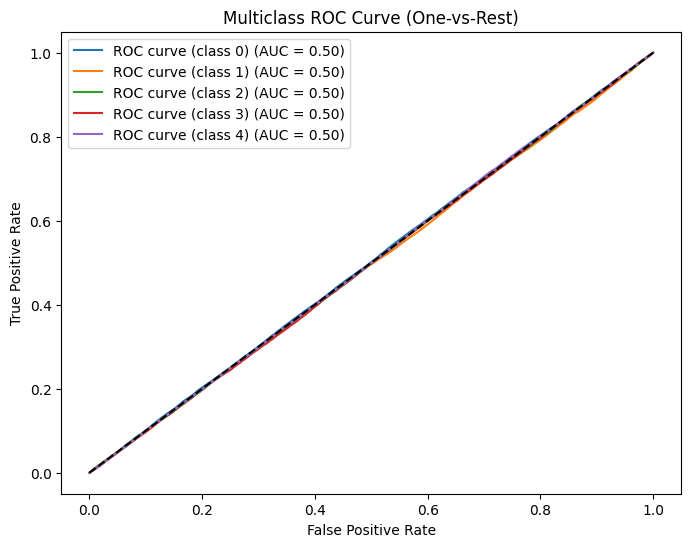

In [6]:
#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#ROC/AUC (if binary or multiclass with one-vs-rest)
if len(np.unique(y)) == 2: #Binary Classification
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

elif len(np.unique(y)) > 2: #Multiclass ROC/AUC (One-vs-Rest)
    from sklearn.preprocessing import label_binarize
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve (One-vs-Rest)')
    plt.legend()
    plt.show()

#Further improvements.
# 1. Feature engineering: Extract relevant features from the ECG signals (e.g., R-peak detection, heart rate variability).
# 2. Hyperparameter tuning: Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for the Gradient Boosting model.
# 3. Cross-validation: Use cross-validation to get a more robust estimate of the model's performance.
# 4. Data balancing: Address class imbalance if present in the data.
# 5. Consider other boosting algorithms: XGBoost, LightGBM, and CatBoost may offer better performance.
# 6. Labeling: The most important. Ensure accurate and correct labeling.
